In [2]:
import matplotlib.pyplot as plt
import io
import numpy as np
import pandas as pd
import nltk
from nltk import FreqDist
from nltk import classify

from keras.preprocessing.text import Tokenizer

from sklearn.model_selection import train_test_split 
%matplotlib inline

In [3]:
data1 = pd.read_csv("./Data/cate.csv")
data1

,Game name,Category
0,Stardew Valley,Casual
1,Cities Skylines,Casual
2,Human Fall Flat,Casual
3,UNO,Casual
4,Deiland,Casual
5,Bloons TD 6,Casual
6,Plants vs. Zombies GOTY Edition,Casual
7,The Sims 3,Casual
8,Planet Zoo,Casual
9,Planet Coaster,Casual


In [4]:
name1=data1['Game name']
#example: read one game description
fname="./Data/"+name1[0]+"/1.txt"
dd=open(fname,"r")
s=dd.read()
s

"Stardew Valley is an open-ended country-life RPG! You've inherited your grandfather's old farm plot in Stardew Valley. Armed with hand-me-down tools and a few coins, you set out to begin your new life. Can you learn to live off the land and turn these overgrown fields into a thriving home? It won't be easy. Ever since Joja Corporation came to town, the old ways of life have all but disappeared. The community center, once the town's most vibrant hub of activity, now lies in shambles. But the valley seems full of opportunity. With a little dedication, you might just be the one to restore Stardew Valley to greatness!"

In [5]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from string import digits
ps = PorterStemmer()
tn1 = RegexpTokenizer(r'\w+')
stop_words=stopwords.words("english")

In [6]:
#Use a for loop to get all game descriptions
#For each game description, remove punctuations, remove stopwords, get the stem words
#Put these in a new list, then combine this list with the table we got before to get the new data table
#In this new table, it shows game names, the key words of each game and the categories
newline=[]
for i in name1:
    filename1="./Data/"+i+"/1.txt"
    filedata=open(filename1,"r")
    filedes=filedata.read()
    filedes=filedes.lower()
    fq=tn1.tokenize(filedes)
    newfq=[]
    for w in fq:
        if w not in stop_words:
            newfq.append(w)
    
    newnewfq=[]
    for w in newfq:
        newnewfq.append(ps.stem(w))
    
    l=list(filter(lambda x: not str(x).isdigit(), newnewfq))
    newline.append(l)



In [8]:
newdf=pd.DataFrame({"Game name":data1['Game name'],"Description key words":newline,"Category":data1['Category']})
newdf.head()

,Game name,Description key words,Category
0,Stardew Valley,"[stardew, valley, open, end, countri, life, rp...",Casual
1,Cities Skylines,"[citi, skylin, modern, take, classic, citi, si...",Casual
2,Human Fall Flat,"[discov, funniest, cooper, physic, base, puzzl...",Casual
3,UNO,"[one, icon, classic, game, grew, know, love, u...",Casual
4,Deiland,"[deiland, singl, player, adventur, rpg, sever,...",Casual


In [9]:
#We will use two lines('Description key words' and 'Category') to build a classification model
#We will seperate our data to training data and testing data
classdf=pd.DataFrame({"Description key words":newdf['Description key words'],"Category":data1['Category']})
classdf.head()

,Description key words,Category
0,"[stardew, valley, open, end, countri, life, rp...",Casual
1,"[citi, skylin, modern, take, classic, citi, si...",Casual
2,"[discov, funniest, cooper, physic, base, puzzl...",Casual
3,"[one, icon, classic, game, grew, know, love, u...",Casual
4,"[deiland, singl, player, adventur, rpg, sever,...",Casual


In [10]:
#split the data into train part and test part

X_train, X_test, y_train, y_test = train_test_split(classdf['Description key words'], classdf['Category'], test_size=0.3)

In [11]:
#Use Word Embeddings method to transfer the sentence to a vector
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(classdf['Description key words'])
X_train1 = tokenizer.texts_to_sequences(X_train)
X_test1 = tokenizer.texts_to_sequences(X_test)
vocab_size= len(tokenizer.word_index) + 1 #add 1 because the number should start from 1
len(X_train1)

44

In [12]:
#get the max length for X, and change all elements in X_train and X_test to be the same length
maxlen=0
for i in classdf['Description key words'] :
    if len(i)>=maxlen:
        maxlen=len(i)

print(maxlen)

252


In [13]:
#Use pad_sequences to do this
from keras.preprocessing.sequence import pad_sequences

X_train1 = pad_sequences(X_train1, padding='post', maxlen=maxlen)
X_test1 = pad_sequences(X_test1, padding='post', maxlen=maxlen)

#This is useful and neccessary for next steps

In [14]:
#transfer y to numbers
tokenizer1 = Tokenizer(num_words=10)
tokenizer1.fit_on_texts(classdf['Category'])
y_train1 = tokenizer1.texts_to_sequences(y_train)
y_test1 = tokenizer1.texts_to_sequences(y_test)
vocab_size1 = len(tokenizer1.word_index) + 1

newy_train=[]
newy_test=[]
for i in y_train1:
    newy_train.append(i[0])

for j in y_test1:
    newy_test.append(j[0])

In [15]:
print(newy_train)

[2, 5, 1, 5, 1, 3, 1, 1, 1, 4, 1, 4, 2, 5, 4, 2, 1, 2, 5, 3, 3, 1, 3, 2, 2, 4, 1, 2, 2, 1, 2, 3, 4, 1, 1, 2, 3, 1, 4, 5, 2, 2, 3, 3]


In [16]:
#Use Neural Networks to do the classification
#Use Keras
#Build model
from keras.models import Sequential
from keras import layers

em_dim = 50
classmodel = Sequential()
classmodel.add(layers.Embedding(input_dim=vocab_size,output_dim=em_dim,input_length=maxlen))
#classmodel.add(layers.Conv1D(128, 5, activation='relu'))#
classmodel.add(layers.GlobalMaxPooling1D())#
#classmodel.add(layers.Flatten())
classmodel.add(layers.Dense(maxlen, activation='relu'))
classmodel.add(layers.Dense(100, activation='relu'))
classmodel.add(layers.Dense(50, activation='relu'))
classmodel.add(layers.Dense(25, activation='sigmoid'))
classmodel.add(layers.Dense(1, activation='sigmoid'))
classmodel.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
classmodel.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 252, 50)           79950     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 252)               12852     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               25300     
_________________________________________________________________
dense_3 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
_________________________________________________________________
dens

In [17]:
#Define a function that show the fit result
plt.style.use('ggplot')

def plot_fit(result):
    acc = result.history['acc']
    val_acc = result.history['val_acc']
    loss = result.history['loss']
    val_loss = result.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training accuracy')
    plt.plot(x, val_acc, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


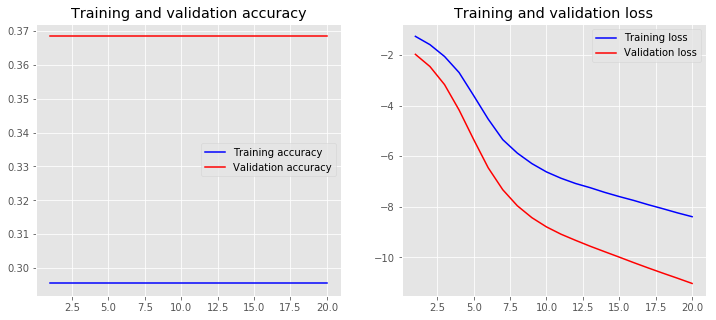

In [18]:
#Fit the data
fit1 = classmodel.fit(X_train1, newy_train, epochs=20,verbose=False,validation_data=(X_test1, newy_test),batch_size=10)
plot_fit(fit1)

In [19]:
#We can see the test accuracy and loss
loss1, accuracy1 = classmodel.evaluate(X_test1, newy_test, verbose=False)
print("Test Accuracy: {:.4f}".format(accuracy1))
print("Test Loss: {:.4f}".format(loss1))

Test Accuracy: 0.3684
Test Loss: -11.0326


In [20]:
#We can also see the train accuracy and loss
loss2, accuracy2 = classmodel.evaluate(X_train1, newy_train, verbose=False)
print("Train Accuracy: {:.4f}".format(accuracy2))
print("Train Loss: {:.4f}".format(loss2))

Train Accuracy: 0.2955
Train Loss: -8.5000


We can see that this result is not not good.
Reasons: 
1. the datasets is not big enough. We need more data.
2. there should be more nodes in the hidden layers.

Try to use another classification module

In [24]:
#Use naivebayes classifier to do the classification
newdf.head()

,Game name,Description key words,Category
0,Stardew Valley,"[stardew, valley, open, end, countri, life, rp...",Casual
1,Cities Skylines,"[citi, skylin, modern, take, classic, citi, si...",Casual
2,Human Fall Flat,"[discov, funniest, cooper, physic, base, puzzl...",Casual
3,UNO,"[one, icon, classic, game, grew, know, love, u...",Casual
4,Deiland,"[deiland, singl, player, adventur, rpg, sever,...",Casual


In [38]:
#Try to use SklearnClassifier to build model
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfTransformer


In [39]:
newdf1lines=[]
for i in newdf['Description key words']:
    st=""
    for j in i:
        st=st+j+" "
    newdf1lines.append(st)

newdf1=pd.DataFrame({"Game name":newdf['Game name'],"Description key words":newdf1lines,"Category":newdf['Category']})
newdf1.head()

,Game name,Description key words,Category
0,Stardew Valley,stardew valley open end countri life rpg inher...,Casual
1,Cities Skylines,citi skylin modern take classic citi simul gam...,Casual
2,Human Fall Flat,discov funniest cooper physic base puzzl platf...,Casual
3,UNO,one icon classic game grew know love uno make ...,Casual
4,Deiland,deiland singl player adventur rpg sever sandbo...,Casual


In [40]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(newdf1['Description key words'], newdf1['Category'], test_size=0.3)

In [41]:
count_vect=CountVectorizer()
X_train1_counts=count_vect.fit_transform(X_train1)
X_train1_counts.shape

(44, 1241)

In [42]:
tfidf_transformer=TfidfTransformer()
X_train1_tfidf=tfidf_transformer.fit_transform(X_train1_counts)
X_train1_tfidf.shape

(44, 1241)

In [45]:
#build a MultinomialNB model
clfmodel=MultinomialNB().fit(X_train1_tfidf, y_train1)

In [47]:
nb=Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])
nb=nb.fit(X_train1, y_train1)

pre1=nb.predict(X_test1)
accuracy_score(y_test1, pre1)

0.3684210526315789

In [64]:
#Try use SVM model
from sklearn.linear_model import SGDClassifier

svm=Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf-svm', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3,  random_state=100)),])
svm=svm.fit(X_train1, y_train1)

pre2=svm.predict(X_test1)
accuracy_score(y_test1, pre2)

0.3157894736842105

We can see that these two results are not good enough.
Reasons:
The dataset is not big enough

We try to build another model by using wordnet to compare the similiarity in order to get the most similiar one.

In [65]:
from nltk.corpus import wordnet

In [82]:
#This time, we will use the classdf dataframe we created before
newdf.head()

,Game name,Description key words,Category
0,Stardew Valley,"[stardew, valley, open, end, countri, life, rp...",Casual
1,Cities Skylines,"[citi, skylin, modern, take, classic, citi, si...",Casual
2,Human Fall Flat,"[discov, funniest, cooper, physic, base, puzzl...",Casual
3,UNO,"[one, icon, classic, game, grew, know, love, u...",Casual
4,Deiland,"[deiland, singl, player, adventur, rpg, sever,...",Casual


In [119]:
#build a function to compare the similarity between input game description and the descriptions in the dataset.
#Get the list of similarity. By finding the index of the largest one, get the category. Also get at most 3 most similar game names
#return that category and the similarity score list
def get_cate(wordslist,data):
    datalen=len(data)
    scorelist=[]
    for i in range(len(data)):
        a=data['Description key words']
        list1=a[i]
        linescore=0
        for word1 in wordslist:
            synsets1=wordnet.synsets(word1)
            wordscore=0
            for word2 in list1:
                synsets2=wordnet.synsets(word2)
                prescore=0
                count=0
                for synset1 in synsets1:
                    for synset2 in synsets2:
                        s=synset1.path_similarity(synset2)
                        if s is not None:
                            prescore+=s
                            count+=1
                if count>0:
                    wordscore=wordscore+prescore/count
            linescore+=wordscore
        scorelist.append(linescore)
    
    maxnum=0
    index=0
    lineplace=0
    for k in scorelist:
        if k>maxnum:
            maxnum=k
            lineplace=index
        index+=1
    
    b=data['Category']
    cate=b[lineplace]
    return cate,scorelist

In [121]:
c=newdf['Description key words']
cc=c[3]
ccc1,sss=get_cate(cc,newdf)
print(ccc1)

Multi


In [123]:
print(sss)

[246.26724102866788, 335.2396063674708, 264.56524551557993, 365.6678564067499, 319.4839395837776, 752.4066481892335, 493.21598477458514, 584.2305998584382, 599.0616872813623, 884.0963615302112, 73.48188135150696, 133.76311623188639, 79.01578040294885, 171.1187160581426, 74.39072507066118, 90.91373867669303, 42.850627182012325, 341.80117953382313, 62.65504288557187, 86.63409985298449, 158.08116002436572, 538.5509265812088, 183.09906162684482, 247.51103197007436, 137.7430070182234, 437.3405158767378, 981.905076148006, 326.38521410209154, 235.601010051123, 568.6773947681162, 83.43055170470745, 103.5677536696499, 199.81296543952308, 328.2045434559279, 58.87984078702571, 133.53312486559685, 68.04969322786128, 284.40640185632793, 459.39796789253984, 159.4193192029946, 335.4263507735417, 200.37488717759067, 365.27303171391316, 40.58144112790069, 83.16819773288996, 71.34969045937962, 107.96661940106593, 88.89279891262116, 265.1857654359992, 147.36826697552706, 238.78836662587852, 82.9998568622

The result is good. But the speed is too slow. Because there are too many words to compare in the synsets

The next part is to use game reviews to set marks for each game

In [125]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/itachi/nltk_data...


True

In [196]:
#Use the game reviews to mark games
#We will use SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

tn2=RegexpTokenizer(r'\w+')
sia=SIA()


In [197]:
reviewscore=[]
for i in name1:
    filename2="./Data/"+i+"/2.txt"
    filedata2=open(filename2,"r")
    file2=filedata2.read()
    
    reviewline=file2.lower()
    po_score=sia.polarity_scores(reviewline)
    linescore=po_score['compound']
    reviewscore.append(linescore)
    
print(reviewscore)

[0.9999, 0.9999, 0.9999, 0.9997, 0.9999, 0.9954, 0.9994, 0.9999, 0.9999, 1.0, 0.9882, 0.9919, 0.9976, 0.9947, 0.9964, 0.9974, 0.992, 0.9986, 0.9979, 0.9919, 0.9999, 0.9988, 0.9997, 0.9999, 0.9998, 0.9998, 0.9944, 0.9995, 0.9998, 0.9999, 0.9999, 0.9999, 0.9987, 0.9993, 0.9998, 0.9998, -0.9771, 0.9998, 0.9998, 0.9996, 0.9998, 0.9995, 0.9998, 0.9977, 0.9666, 0.9814, 0.9932, 0.9679, 0.995, 0.8702, 0.9984, 0.9981, 0.9022, 0.9996, 0.9975, 0.9995, 0.9997, 0.9994, 0.9957, 0.952, 0.9984, 0.7695, 0.9966]


In [210]:
#build a function
#find 3 largest ones, then find these games. These are recommanded games
def recom_games(list1,list2,data):
    finalscore=[]
    for i in range(len(list1)):
        a=list1[i-1]*list2[i-1]
        finalscore.append(a)
    
    largelist=[0,0,0]
    indexlist=[-1,-1,-1]
    for j in range(len(finalscore)):
        if finalscore[j-1]>largelist[0]:
            largelist[0]=finalscore[j-1]
            indexlist[0]=j-1
        else:
            if finalscore[j-1]>largelist[1]:
                largelist[1]=finalscore[j-1]
                indexlist[1]=j-1
            else:
                if finalscore[j-1]>largelist[2]:
                    largelist[2]=finalscore[j-1]
                    indexlist[2]=j-1
    
    gamelist=[]
    for k in indexlist:
        b=data['Game name']
        name=b[k]
        gamelist.append(name)
    return gamelist

In [211]:
#try an example

try1=recom_games(sss,reviewscore,newdf)
print(try1)

['War Thunder', 'Planet Coaster', 'Black Mesa']


This is the result. Looks good!